In [2]:
import tensorflow as tf

In [3]:
import input_data

In [5]:
mnist_dataset = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [6]:
# training dataset
train_set = mnist_dataset.train
# test dataset
test_set = mnist_dataset.test
print('Training dataset size: ', train_set.num_examples)
print('Test dataset size: ', test_set.num_examples)


Training dataset size:  55000
Test dataset size:  10000


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


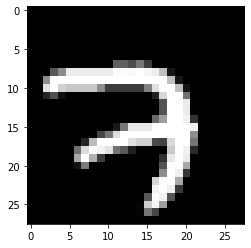

In [8]:
import matplotlib.pyplot as plt
import numpy as np
example_id = 0
image = train_set.images[example_id] # shape = 784 (28*28)
label = train_set.labels[example_id] # shape = 1
print(label)
plt.imshow(np.reshape(image,[28,28]),cmap='gray')
plt.show()

In [9]:
image.shape

(784,)

In [10]:
label.shape

(10,)

In [11]:
def logistic(x):
    return 1/(1+np.exp(-x))

In [12]:
logistic(np.array([0,3,4]))

array([0.5       , 0.95257413, 0.98201379])

In [83]:
w=np.zeros([784,10])
b=np.zeros(10)

In [60]:
def compute_acc(test=True):
    if test:
        res=np.dot(test_set.images,w)
        test_pred=np.argmax(res,axis=1)
        test_true=np.argmax(test_set.labels,axis=1)
        err=(test_pred-test_true)
        test_acc=err[err==0].size/test_set.num_examples
        return test_acc
    else:
        res=np.dot(train_set.images,w)
        train_pred=np.argmax(res,axis=1)
        train_true=np.argmax(train_set.labels,axis=1)
        err=(train_pred-train_true)
        train_acc=err[err==0].size/train_set.num_examples
        return train_acc
        

In [67]:
print(compute_acc(test=False))

0.8568


In [ ]:
test_accs=[]
train_accs=[]
train_losss=[]

In [90]:
batch_size = 100
max_epoch = 5
learning_rate = 0.01

for epoch in range(0, max_epoch):
    iter_per_batch = train_set.num_examples // batch_size
    for batch_id in range(0, iter_per_batch):
        # get the data of next minibatch (have been shuffled)
        batch = train_set.next_batch(batch_size)
        input, label = batch
        # prediction
        pred=logistic(np.dot(input,w)+b)
        # calculate the loss (and accuracy)
        grad=pred-label
        grads=np.zeros(w.shape)
        loss=0
        for i in range(batch_size):
            grads+=np.dot(np.transpose(input[i]).reshape(784,1),grad[i].reshape(1,10))
        loss=-np.sum(np.multiply(label,np.log(pred))+np.multiply((1-label),np.log(1-pred)))/batch_size
        err=(np.argmax(pred,axis=1)-np.argmax(label,axis=1))
        train_accs.append(err[err==0].size/batch_size)
        train_losss.append(loss)
        # print(loss)
        # update weights
        w -= learning_rate*grads/batch_size
        test_accs.append(compute_acc())

    # print(loss)
# print(input.shape,label.shape)
# print(pred.shape)
# print(loss)    

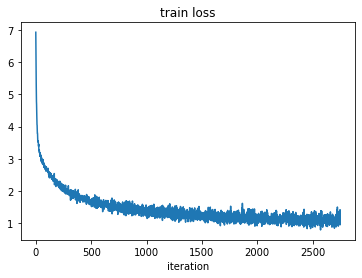

In [89]:
plt.plot(train_losss)
plt.title('train loss')
plt.xlabel('iteration')
plt.show()

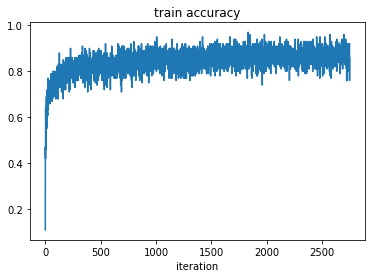

In [88]:
plt.plot(train_accs)
plt.title('train accuracy')
plt.xlabel('iteration')
plt.show()

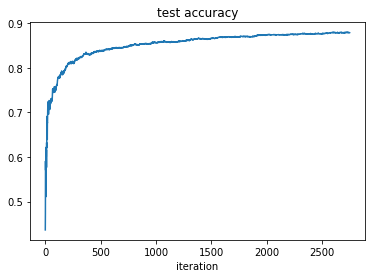

In [86]:
plt.plot(test_accs)
plt.title('test accuracy')
plt.xlabel('iteration')
plt.show()

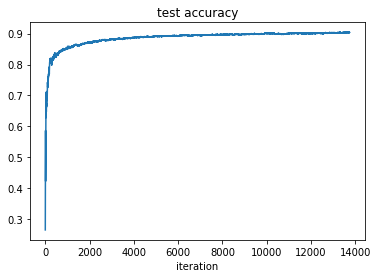

In [78]:
plt.plot(test_accs)
plt.title('test accuracy')
plt.xlabel('iteration')
plt.show()

In [15]:
res=np.dot(test_set.images,w)

In [16]:
np.argmax(res,axis=1)[:23]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6], dtype=int64)

In [17]:
np.argmax(test_set.labels,axis=1)[:23]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6], dtype=int64)

In [92]:
res=np.dot(test_set.images,w)
test_pred=np.argmax(res,axis=1)
test_true=np.argmax(test_set.labels,axis=1)
err=(test_pred-test_true)
test_acc=err[err==0].size/test_set.num_examples
print(test_acc)

0.8929


In [19]:
err=(test_pred-test_true)

In [20]:
err[err==0].size/test_set.num_examples

0.9126